Text(0, 0.5, 'Cycle life')

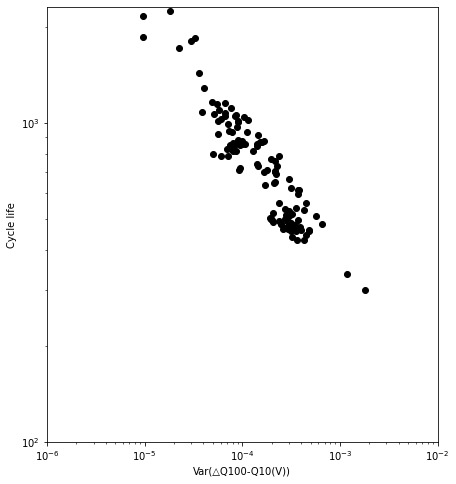

In [2]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

X=[]
Y=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    X.append(var)
    Y.append(cycle[0][0])
    
plt.figure(figsize=(7,8))
plt.scatter(X,Y,color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')

In [2]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [3]:
bat_dict['b1c1'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [8]:
bat_dict['b1c1']['cycles']['1'].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [7]:
bat_dict['b1c1']['cycles']['1']['dQdV']

array([-0.01066335, -0.01066335, -0.01066335, -0.01066335, -0.01066335,
       -0.01066335, -0.01066335, -0.01066335, -0.01066335, -0.01066335,
       -0.01066335, -0.01066335, -0.01066335, -0.01066335, -0.01066335,
       -0.01066335, -0.01066335, -0.01066335, -0.01066335, -0.01066335,
       -0.01066335, -0.01066335, -0.01066335, -0.0111016 , -0.01321917,
       -0.01701607, -0.02249229, -0.02964783, -0.03848271, -0.0489969 ,
       -0.06029775, -0.07159859, -0.08246119, -0.09164447, -0.09914841,
       -0.10497304, -0.10911834, -0.11158431, -0.11237096, -0.11237096,
       -0.11237096, -0.11237096, -0.11237096, -0.11237096, -0.11237096,
       -0.11237096, -0.11237096, -0.11237096, -0.11237096, -0.11237096,
       -0.11237096, -0.11299258, -0.1142606 , -0.11617499, -0.11873578,
       -0.12194295, -0.12579651, -0.13010235, -0.13440818, -0.13871402,
       -0.14239824, -0.14543606, -0.1478275 , -0.14957256, -0.15030192,
       -0.1495968 , -0.14765129, -0.14491769, -0.14139599, -0.13

In [13]:
len(bat_dict['b1c1']['cycles']['1']['dQdV']),len(bat_dict['b1c1']['cycles']['1']['t'])

(1000, 1091)

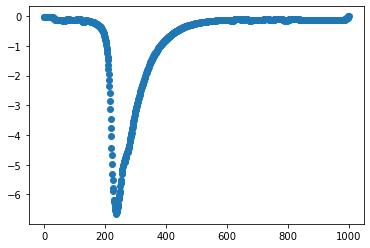

In [14]:
plt.scatter(range(len(bat_dict['b1c1']['cycles']['1']['dQdV'])),bat_dict['b1c1']['cycles']['1']['dQdV'])

In [8]:
bat_dict['b1c1']['summary']['chargetime']

array([ 0.        , 13.42605667, 13.34152   , ..., 21.04236833,
       21.24845833, 24.04698833])

In [32]:
mat_file_name =  "D:/ML/data/dqdv/finaldata_4.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [33]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'None', '__function_workspace__'])

In [60]:
print(mat_file['None'])

[(b'final_4C', b'MCOS', b'table', array([[3707764736],
       [         2],
       [         1],
       [         1],
       [         1],
       [         1]], dtype=uint32))]


In [56]:
print(mat_file['__function_workspace__'][0])

[ 0  1 73 ...  0  0  0]


In [65]:
mat_file['__function_workspace__'][0][:100]

array([  0,   1,  73,  77,   0,   0,   0,   0,  14,   0,   0,   0,  40,
       218,   2,   0,   6,   0,   0,   0,   8,   0,   0,   0,   2,   0,
         0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   8,   0,   0,
         0,   1,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   5,   0,   4,   0,   5,   0,   0,   0,   1,
         0,   0,   0,   5,   0,   0,   0,  77,  67,  79,  83,   0,   0,
         0,   0,  14,   0,   0,   0, 224, 217,   2,   0,   6,   0,   0,
         0,   8,   0,   0,   0,  17,   0,   0,   0], dtype=uint8)

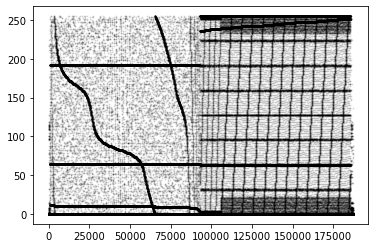

In [69]:
plt.scatter(range(len(mat_file['__function_workspace__'][0])),mat_file['__function_workspace__'][0],alpha=0.1,s=1,color='black')

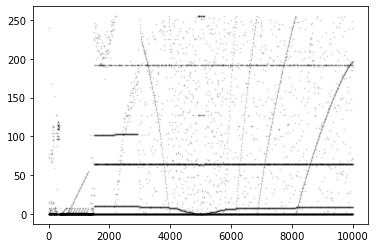

In [72]:
mat_file_name =  "D:/ML/data/dqdv/initialdata_all.mat"
mat_file = scipy.io.loadmat(mat_file_name)
plt.scatter(range(len(mat_file['__function_workspace__'][0][:10000])),mat_file['__function_workspace__'][0][:10000],alpha=0.1,s=1,color='black')

In [9]:
data = pd.read_csv('D:/ML/data/charge_4C.csv')

In [78]:
data

,V,I,Q
0,3.300018,0.000000,0.000000
1,3.300048,0.000000,0.000000
2,3.300039,0.000000,0.000000
3,3.300040,0.000000,0.000000
4,3.299997,0.000000,0.000000
...,...,...,...
204668,2.794736,-4.400214,0.996753
204669,2.784677,-4.400214,0.999464
204670,2.774657,-4.400210,1.002031
204671,2.764643,-4.400234,1.004484


In [83]:
data.iloc[:,[0]]

,V
0,3.300018
1,3.300048
2,3.300039
3,3.300040
4,3.299997
...,...
204668,2.794736
204669,2.784677
204670,2.774657
204671,2.764643


In [84]:
data.iloc[:,[1]]

,I
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
204668,-4.400214
204669,-4.400214
204670,-4.400210
204671,-4.400234


In [85]:
data.iloc[:,[2]]

,Q
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
204668,0.996753
204669,0.999464
204670,1.002031
204671,1.004484


Text(0, 0.5, 'V')

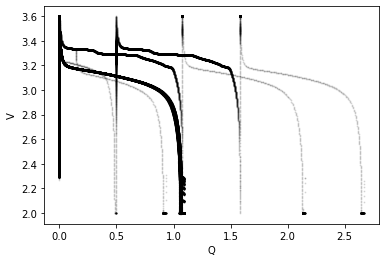

In [15]:
plt.scatter(data.iloc[:,[2]], data.iloc[:,[0]],alpha=0.1,s=1,color='black')
plt.xlabel('Q')
plt.ylabel('V')

Text(0, 0.5, 'V')

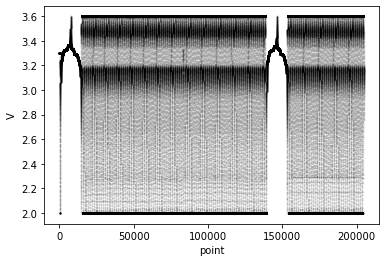

In [17]:
plt.scatter(range(len(data.iloc[:,[0]])), data.iloc[:,[0]],alpha=0.1,s=1,color='black')
plt.xlabel('point')
plt.ylabel('V')

Text(0, 0.5, 'Q')

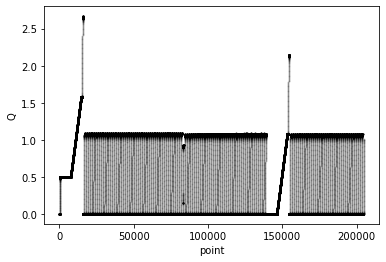

In [18]:
plt.scatter(range(len(data.iloc[:,[0]])), data.iloc[:,[2]],alpha=0.1,s=1,color='black')
plt.xlabel('point')
plt.ylabel('Q')